<h2>This code is implemeneted based on my judgement of "(k,q)-core decomposition of hypergraphs" research paper</h2>

In [1]:
import numpy as np 
import pandas as pd
import networkx as nx
import hypernetx as hnx
import matplotlib.pyplot as plt
from random import randint

In [2]:
'''
These are the core nodes 
Later we will go through the hyperedges and replace the numbers that exist in the map to their value. 
'''


file = open('data/addresses-email-Enron.txt')
map = {}

for pair in file:
    (k,v) = pair.split(" ")
    map[k] = v[:-1]    # [:-1] removes the '\n'
file.close()
print(f"There are {len(map)} core nodes")

There are 148 core nodes


<h3>Originally there are 15653 hyperedges. Since this is a demonstration, I've cut it down to only the core nodes.</h3>

In [3]:
'''
Now I'm going to make a list of sets of email recipients. Since im filtering out non-core nodes, some hyperedges may only be a core node after
filteration. I don't want those. I only want communciation between core nodes. 
'''


file = open('data/email-Enron.txt')
set_list = []

for line in file:
    s = set() 
    for number in line[:-1].split(" "):
        if number in map:
            s.add(map[number])        
    if len(s) > 1: set_list.append(s)
file.close()

print(f"There are {len(set_list)} hyperedges of only core nodes")
print(f"A random set: {set_list[randint(0, len(set_list))]}")

There are 4058 hyperedges of only core nodes
A random set: {'darrell.schoolcraft@enron.com', 'shelley.corman@enron.com'}


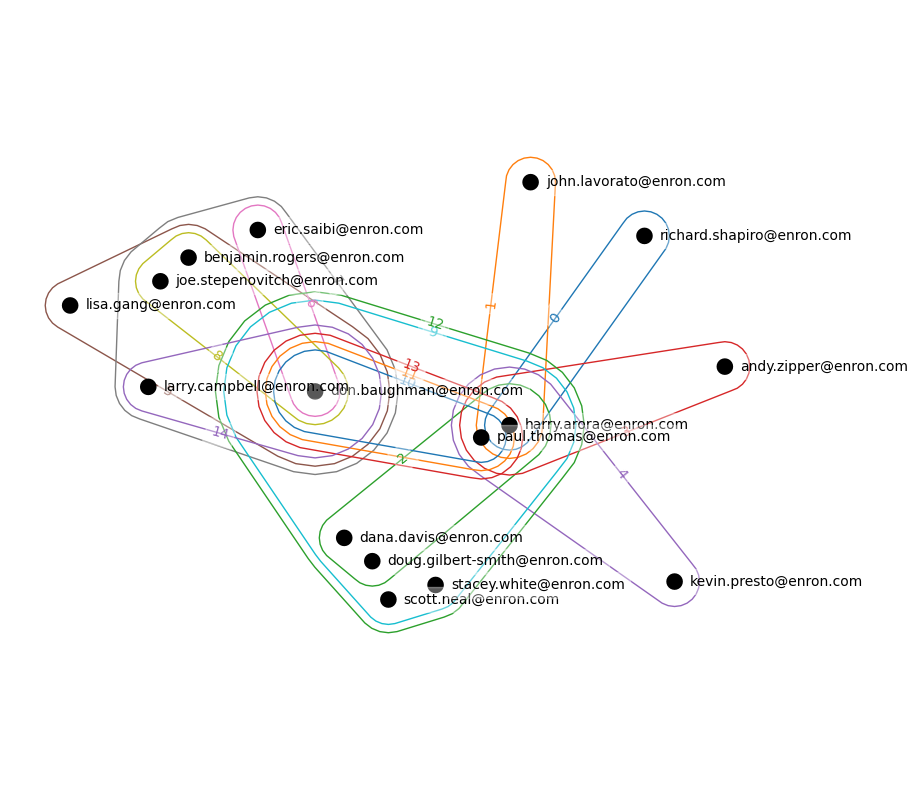

In [4]:
'''
I'm only presenting the first 15 since the graph turns into a circle with all hyperedges
'''

H = hnx.Hypergraph(set_list[:15])
plt.subplots(figsize=(10,10))
hnx.draw(H)

<h4>In (k, q) core k is the frequency of a node's connections and q is the size of the hyperedge.</h4>

In [7]:
go = True
k, q = 5, 11
freq_map = {}

while go:
    # go is a flag. If any part of the algorithm makes an update. It will set go to true to re-run the loop.
    go = False
    
    for s in set_list:
        for node in s:
            if node not in freq_map:
                freq_map[node] = 1
            else:
                freq_map[node] += 1

    # dicts cannot be edited and traversed
    remove = set()
    for x in freq_map:
        if freq_map[x] < k:
            remove.add(x)
            go = True
    
    for node in remove:
        freq_map.pop(node)
        
    # check every item in removed against every set and remove the item from the set if they match. 
    for node in remove:
        for s in set_list:
            if node in s:
                s.remove(node)
                go = True

    #sort the list and pop lens lower than q 
    set_list.sort(key=len, reverse=True)
    while len(set_list[-1]) < q: 
        set_list.pop()
        go = True

print(f"the new number of hyperedges are {len(set_list)}")

the new number of hyperedges are 3


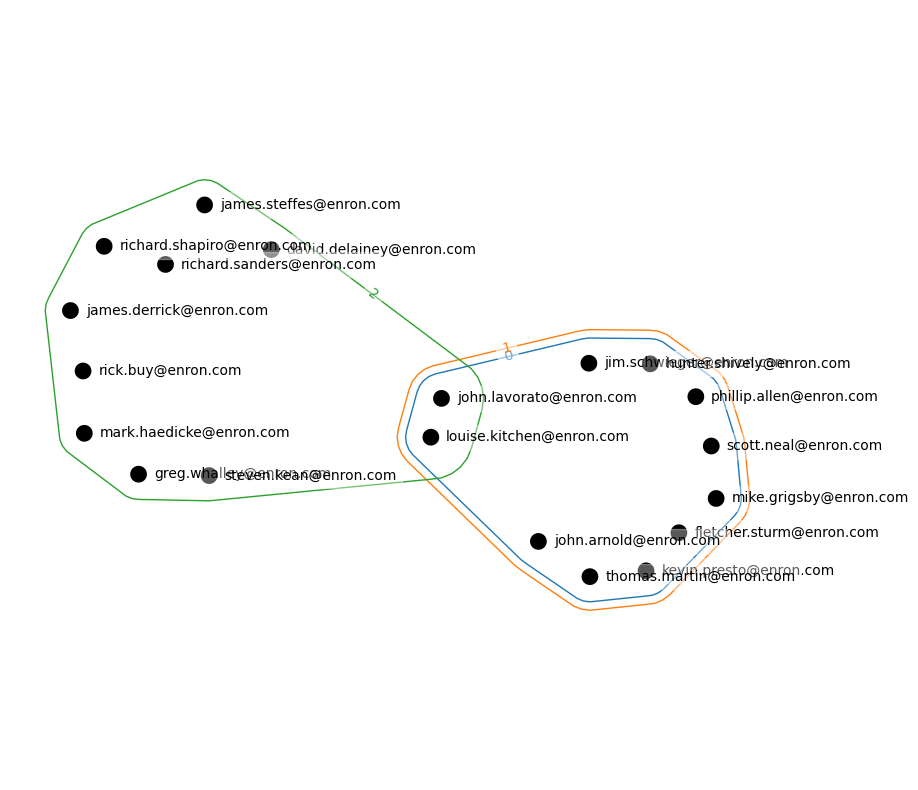

In [8]:
H = hnx.Hypergraph(set_list)
plt.subplots(figsize=(10,10))
hnx.draw(H)